### Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [6]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np

In [23]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x2 = MaxPooling2D((2, 2), padding='same')(x1)
x3 = Conv2D(8, (6, 6), activation='relu', padding='same')(x2)
x4 = MaxPooling2D((2, 2), padding='same')(x3)
x5 = Conv2D(8, (9, 9), activation='relu', padding='same')(x4)
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x6 = Conv2D(8, (9, 9), activation='relu', padding='same')(encoded)
x7 = UpSampling2D((2, 2))(x6)
x8 = Conv2D(8, (6, 6), activation='relu', padding='same')(x7)
x9 = UpSampling2D((2, 2))(x8)
x10 = Conv2D(16, (3, 3), activation='relu', padding='same')(x9)
x11 = UpSampling2D((2, 2))(x10)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x11)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adagrad', loss='binary_crossentropy')

In [24]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format

In [25]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 148s - loss: 0.6373 - val_loss: 0.6144
Epoch 2/50
50000/50000 [==============================] - 148s - loss: 0.6095 - val_loss: 0.6055
Epoch 3/50
50000/50000 [==============================] - 149s - loss: 0.6035 - val_loss: 0.6015
Epoch 4/50
50000/50000 [==============================] - 149s - loss: 0.5995 - val_loss: 0.5982
Epoch 5/50
50000/50000 [==============================] - 148s - loss: 0.5964 - val_loss: 0.5952
Epoch 6/50
50000/50000 [==============================] - 149s - loss: 0.5939 - val_loss: 0.5937
Epoch 7/50
50000/50000 [==============================] - 147s - loss: 0.5918 - val_loss: 0.5911
Epoch 8/50
50000/50000 [==============================] - 147s - loss: 0.5904 - val_loss: 0.5906
Epoch 9/50
50000/50000 [==============================] - 149s - loss: 0.5894 - val_loss: 0.5897
Epoch 10/50
50000/50000 [==============================] - 147s - loss: 0.588

In [2]:
from keras.models import load_model

#autoencoder.save('cifar10_autoencoders.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model.


Using TensorFlow backend.


In [3]:
# returns a compiled model
# identical to the previous one
autoencoder = load_model('cifar10_autoencoders.h5')

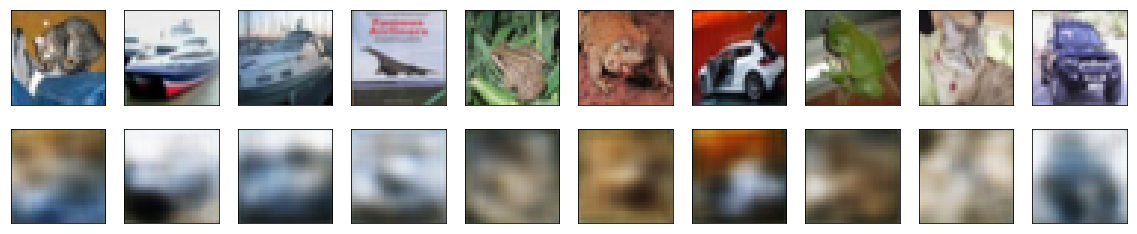

In [26]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Plotting the weights from the first layer

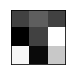

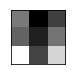

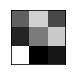

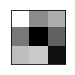

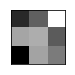

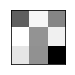

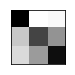

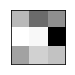

In [16]:
import matplotlib.pyplot as plt

n = 8

for i in range(n):
    fig = plt.figure(figsize=(1,1))
    conv_1 = np.asarray(autoencoder.layers[1].get_weights())[0][:,:,0,i]
    ax = fig.add_subplot(111)
    plt.imshow(conv_1.transpose(), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

In [22]:
autoencoder.layers[3].get_weights()

[array([[[[  8.15488771e-03,   6.07780479e-02,   3.52038592e-02, ...,
            -2.57759839e-02,   2.50405464e-02,   1.37642130e-01],
          [ -3.99612933e-02,  -4.31965627e-02,   1.55702168e-02, ...,
            -8.22575167e-02,  -4.86114547e-02,  -1.07376175e-02],
          [  2.30774172e-02,  -7.45867491e-02,   1.08525492e-01, ...,
             1.43861622e-01,  -6.99539408e-02,  -7.41299391e-02],
          ..., 
          [  7.24775046e-02,   8.09480175e-02,   3.54284123e-02, ...,
             5.34150703e-03,  -2.38414649e-02,   1.27396472e-02],
          [ -2.81182081e-02,  -6.24120310e-02,  -6.73905341e-03, ...,
            -4.32974026e-02,   2.54292060e-02,   1.36202216e-01],
          [ -2.24752557e-02,   5.53492494e-02,   5.22947162e-02, ...,
            -1.27160829e-02,   6.90510496e-02,  -5.76434610e-03]],
 
         [[  2.35560397e-03,  -2.85049598e-03,  -4.39689942e-02, ...,
             3.96229811e-02,  -5.18459417e-02,  -1.98029634e-02],
          [  4.41494137e-02, 

In [42]:
from keras import backend as K

In [27]:
# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + autoencoder.inputs

_layer1_f = K.function(inputs, [x2])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _layer1_f([0] + [X])

#_lay_f = K.function(inputs, [x1])
#def convout1_f(X):
    # The [0] is to disable the training phase flag
#    return _layer1_f([0] + [X])

_layer2_f = K.function(inputs, [x4])
def convout2_f(X):
    # The [0] is to disable the training phase flag
    return _layer2_f([0] + [X])

_layer3_f = K.function(inputs, [encoded])
def convout3_f(X):
    # The [0] is to disable the training phase flag
    return _layer3_f([0] + [X])

_up_layer1_f = K.function(inputs, [x6])
def convout4_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer1_f([0] + [X])

_up_layer2_f = K.function(inputs, [x8])
def convout5_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer2_f([0] + [X])

_up_layer3_f = K.function(inputs, [x10])
def convout6_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer3_f([0] + [X])

_up_layer4_f = K.function(inputs, [decoded])
def convout7_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer4_f([0] + [X])


In [44]:
x2

<tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 16, 16, 16) dtype=float32>

In [45]:
i = 1
x = x_test[i:i+1]

### Visualizing the first convnet/output layer_1 with sample first test image

In [46]:
np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0).shape

(16, 16, 16)

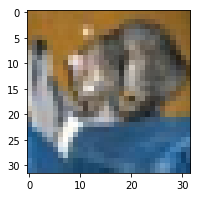

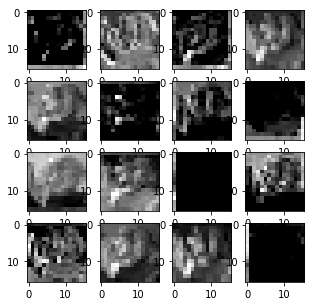

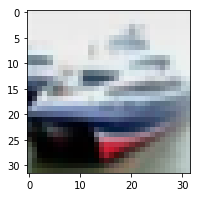

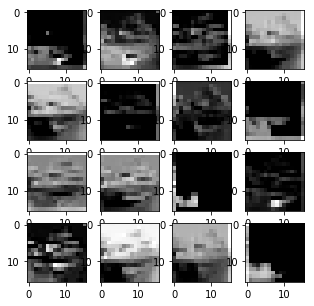

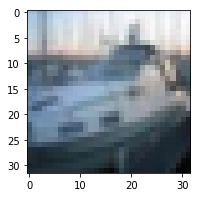

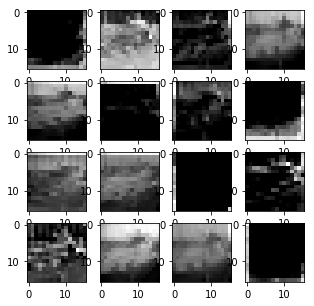

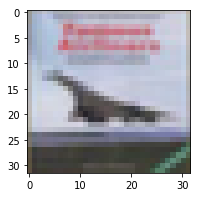

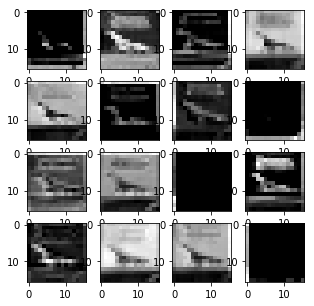

In [81]:
#Plotting conv_1
for i in range(4):
    #i = 3
    x = x_test[i:i+1]
    check = np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0)

    temp = x[0,:,:,:]
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    plt.imshow(temp)
    plt.show()


    k = 0
    while k < check.shape[2]:
        #plt.figure()
        #plt.subplot(231 + i)
        fig, axes = plt.subplots(4, 4, figsize=(5, 5))
        for i in range(4):
            for j in range(4):
                axes[i,j].imshow(check[:,:,k], cmap = 'gray')
                k += 1
        #axes[0, 0].imshow(R, cmap='jet')
        #plt.imshow(check[:,:,i])

    plt.show()

In [59]:
check.shape

(16, 16, 16)

### Visualizing the second convnet/output layer_2 with sample test image

In [42]:
i = 3
x = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout2_f(x)),0),0)
check.shape

(8, 8, 8)

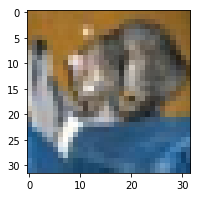

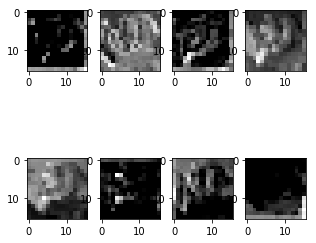

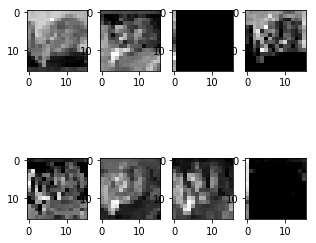

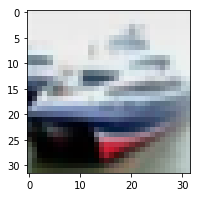

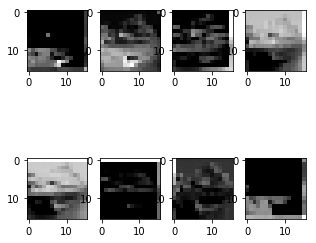

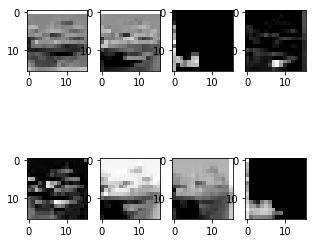

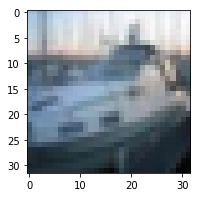

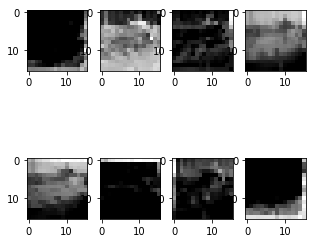

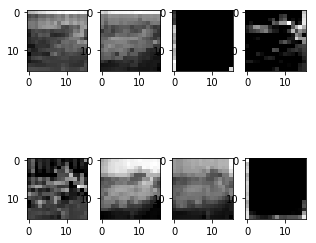

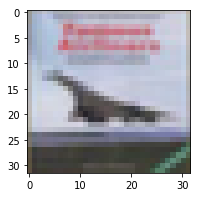

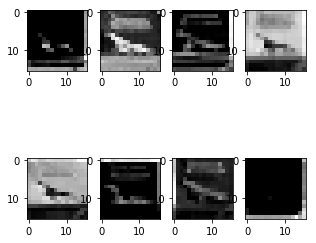

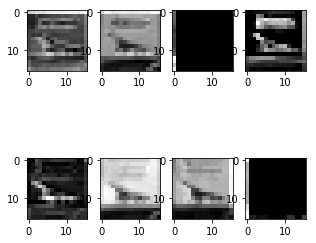

In [82]:
#Plotting conv_2
for i in range(4):
    #i = 3
    x = x_test[i:i+1]
    check = np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0)

    temp = x[0,:,:,:]
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    plt.imshow(temp)
    plt.show()


    k = 0
    while k < check.shape[2]:
        #plt.figure()
        #plt.subplot(231 + i)
        fig, axes = plt.subplots(2, 4, figsize=(5, 5))
        for i in range(2):
            for j in range(4):
                axes[i,j].imshow(check[:,:,k])
                k += 1
        #axes[0, 0].imshow(R, cmap='jet')
        #plt.imshow(check[:,:,i])

    plt.show()

### Plotting the third convnet/output layer_3 with sample test image

In [50]:
i = 3
x = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout3_f(x)),0),0)
check.shape

(4, 4, 8)

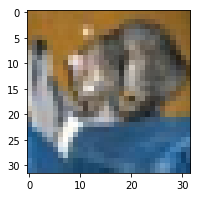

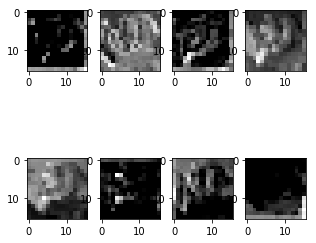

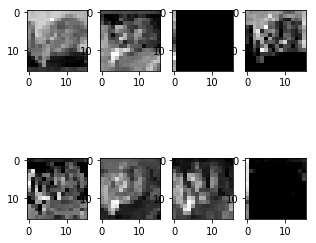

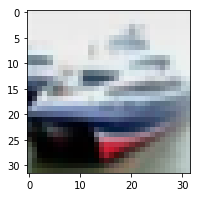

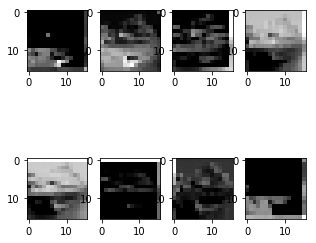

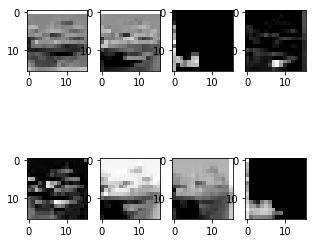

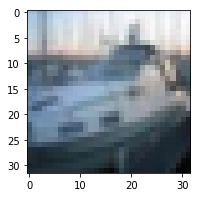

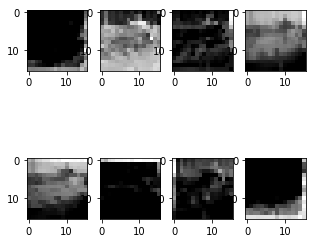

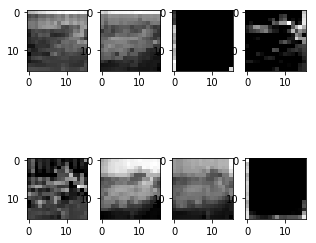

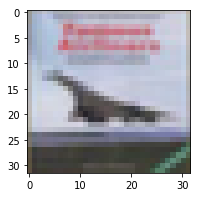

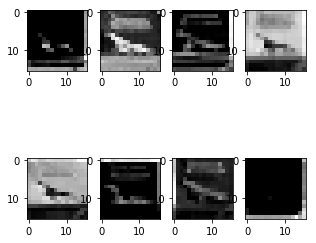

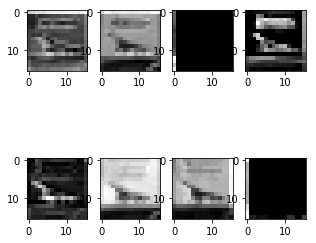

In [83]:
#Plotting conv_3
for i in range(4):
    #i = 3
    x = x_test[i:i+1]
    check = np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0)

    temp = x[0,:,:,:]
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    plt.imshow(temp)
    plt.show()


    k = 0
    while k < check.shape[2]:
        #plt.figure()
        #plt.subplot(231 + i)
        fig, axes = plt.subplots(2, 4, figsize=(5, 5))
        for i in range(2):
            for j in range(4):
                axes[i,j].imshow(check[:,:,k])
                k += 1
        #axes[0, 0].imshow(R, cmap='jet')
        #plt.imshow(check[:,:,i])

    plt.show()

### Visualizing the fourth convnet/decoded/output layer_4 with sample test image

In [58]:
i = 3
x = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout4_f(x)),0),0)
check.shape

(4, 4, 8)

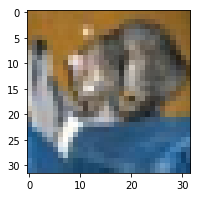

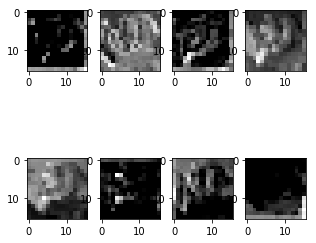

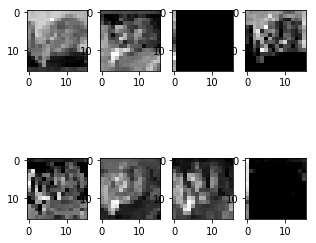

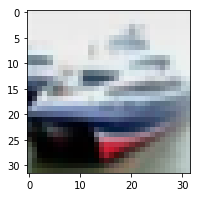

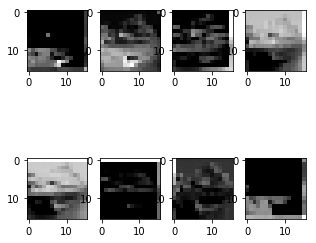

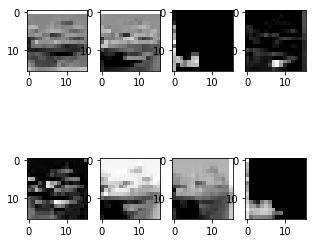

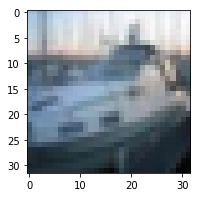

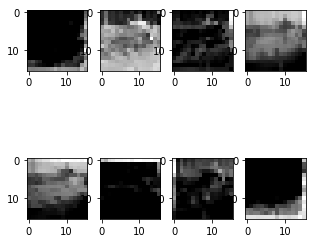

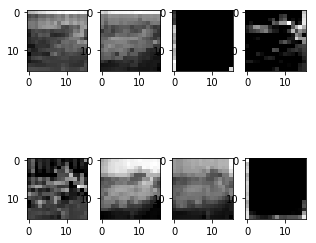

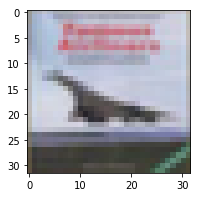

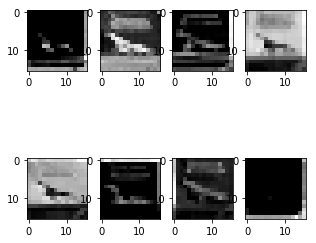

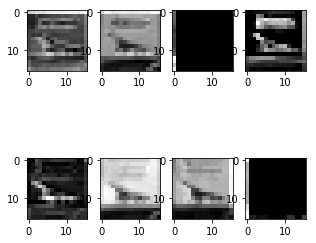

In [84]:
#Plotting conv_4
for i in range(4):
    #i = 3
    x = x_test[i:i+1]
    check = np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0)

    temp = x[0,:,:,:]
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    plt.imshow(temp)
    plt.show()

    k = 0
    while k < check.shape[2]:
        #plt.figure()
        #plt.subplot(231 + i)
        fig, axes = plt.subplots(2, 4, figsize=(5, 5))
        for i in range(2):
            for j in range(4):
                axes[i,j].imshow(check[:,:,k])
                k += 1
        #axes[0, 0].imshow(R, cmap='jet')
        #plt.imshow(check[:,:,i])

    plt.show()

### Visualizing the fifth convnet/decoded/output layer_5 with sample test image

In [66]:
i = 3
x = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout5_f(x)),0),0)
check.shape

(8, 8, 8)

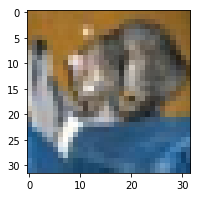

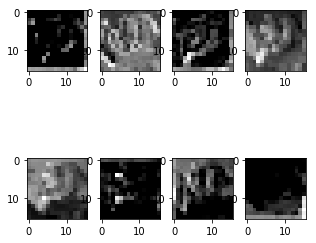

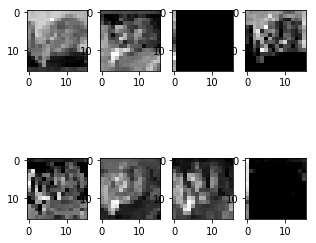

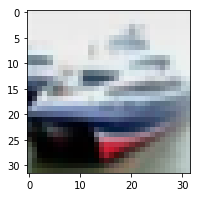

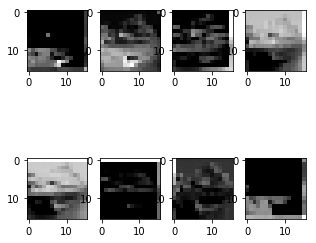

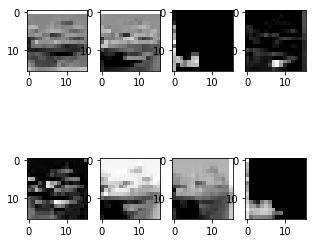

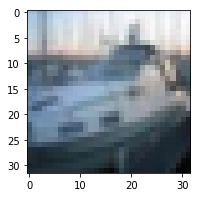

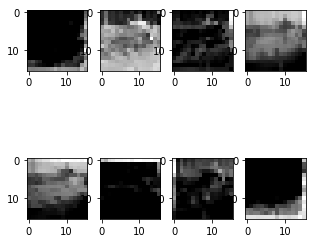

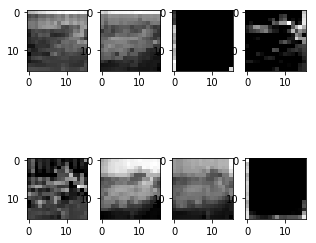

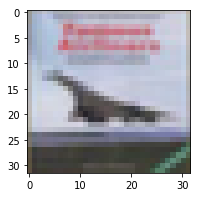

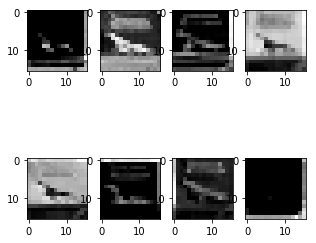

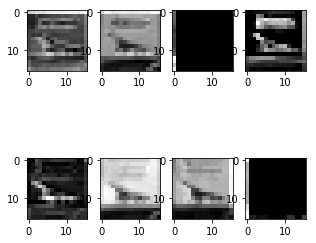

In [85]:
#Plotting conv_5
for i in range(4):
    #i = 3
    x = x_test[i:i+1]
    check = np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0)

    temp = x[0,:,:,:]
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    plt.imshow(temp)
    plt.show()


    k = 0
    while k < check.shape[2]:
        #plt.figure()
        #plt.subplot(231 + i)
        fig, axes = plt.subplots(2, 4, figsize=(5, 5))
        for i in range(2):
            for j in range(4):
                axes[i,j].imshow(check[:,:,k])
                k += 1
        #axes[0, 0].imshow(R, cmap='jet')
        #plt.imshow(check[:,:,i])

    plt.show()

### Visualizing the sixth convnet/decoded/output layer_6 with sample test image

In [74]:
i = 3
x = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout6_f(x)),0),0)
check.shape

(16, 16, 16)

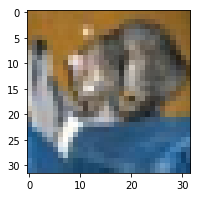

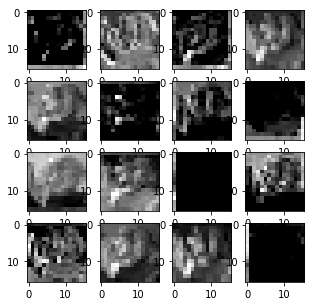

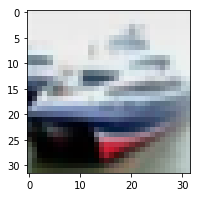

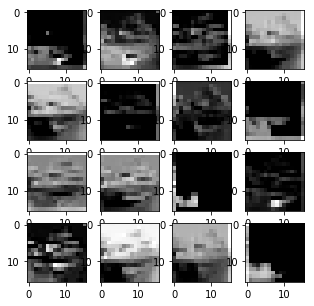

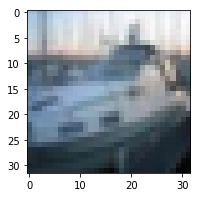

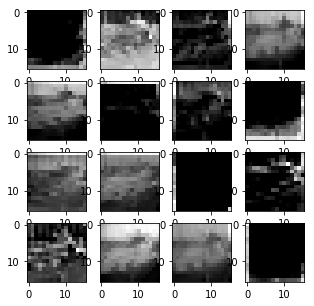

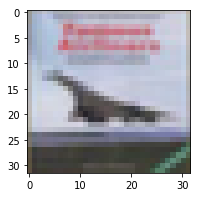

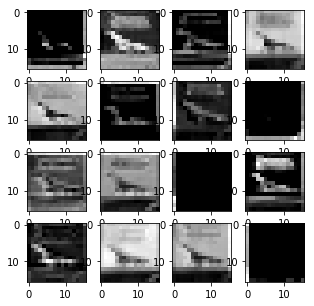

In [86]:
#Plotting conv_6
for i in range(4):
    #i = 3
    x = x_test[i:i+1]
    check = np.squeeze(np.squeeze(np.array(convout1_f(x)),0),0)

    temp = x[0,:,:,:]
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    plt.imshow(temp)
    plt.show()


    k = 0
    while k < check.shape[2]:
        #plt.figure()
        #plt.subplot(231 + i)
        fig, axes = plt.subplots(4, 4, figsize=(5, 5))
        for i in range(4):
            for j in range(4):
                axes[i,j].imshow(check[:,:,k])
                k += 1
        #axes[0, 0].imshow(R, cmap='jet')
        #plt.imshow(check[:,:,i])

    plt.show()

### Visualizing the final decoded/output layer with sample test image

In [76]:
i = 1
x = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout7_f(x)),0),0)
check.shape

(32, 32, 3)

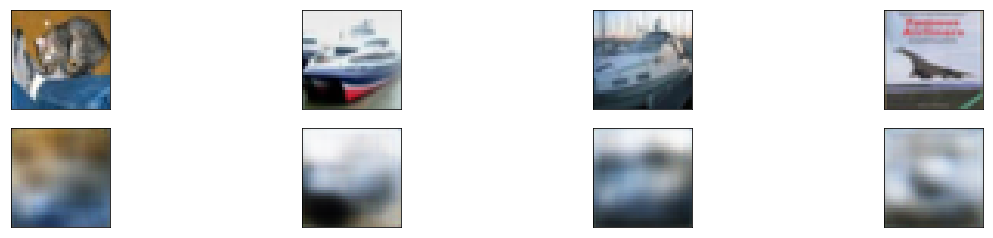

In [80]:
#Plot final decoded layer

decoded_imgs = autoencoder.predict(x_test)

n = 4
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()